In [83]:
import pandas as pd

In [84]:
df=pd.read_excel("C:\\Users\\adity\\Downloads\\project1\\spam.xlsx")

In [85]:
df.to_csv

<bound method NDFrame.to_csv of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [86]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [87]:
df.shape

(5572, 5)

**Data  Cleaning**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [89]:
# as column =['Unnamed:2','Unnamed:3','Unnamed:4'] has most of their value to be null so droping these column not afffect our database
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [90]:
df.sample(5)

,v1,v2
535,ham,"Good afternoon, my love! How goes that day ? I..."
4910,ham,Love that holiday Monday feeling even if I hav...
115,ham,"As I entered my cabin my PA said, '' Happy B'd..."
4354,ham,"Sorry, I can't help you on this."
5522,ham,Thats cool. I want to please you...


In [91]:
# renaming the columns for description
df.rename(columns={'v1':'label','v2':'text'},inplace=True)
df.sample(5)

,label,text
4408,spam,For your chance to WIN a FREE Bluetooth Headse...
1716,ham,Sorry about earlier. Putting out fires.Are you...
4859,ham,"\Response\"" is one of d powerful weapon 2 occu..."
3299,ham,Just do what ever is easier for you
302,ham,Oh and by the way you do have more food in you...


In [92]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [93]:
df['label']=encoder.fit_transform(df['label']) 

In [94]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
# missing value
df.isnull().sum()

label    0
text     0
dtype: int64

In [96]:
#cheking duplicate values and removing
df.duplicated().sum()

403

In [97]:
df=df.drop_duplicates(keep='first')

In [98]:
df.duplicated().sum()

0

In [99]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**EDA**

In [100]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [101]:
import matplotlib.pyplot as plt

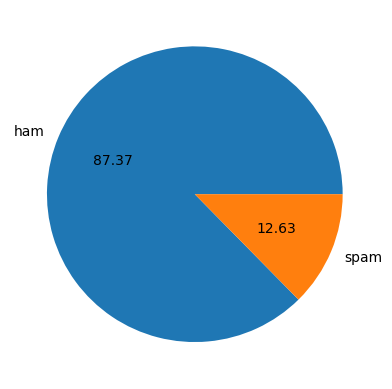

In [102]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f");

In [103]:
# Data is imbalanced
!pip install nltk

In [104]:
import nltk

In [105]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [106]:
df['number_of_char']=df['text'].apply(lambda x:len(str(x)))

C:\Users\adity\AppData\Local\Temp\ipykernel_17516\4224949725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_char']=df['text'].apply(lambda x:len(str(x)))


In [107]:
df.head()

,label,text,number_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [108]:
# number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(str(x))))

C:\Users\adity\AppData\Local\Temp\ipykernel_17516\356711983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(str(x))))


In [109]:
df.head()

,label,text,number_of_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [110]:
#number of sentences in text
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(str(x))))

C:\Users\adity\AppData\Local\Temp\ipykernel_17516\1540468010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(str(x))))


In [111]:
df.head()

,label,text,number_of_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [112]:
df[['number_of_char','num_words','num_sentences']].describe()

,number_of_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455794,1.965564
std,58.239404,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [113]:
# not spam messge
df[df['label']==0][['number_of_char','num_words','num_sentences']].describe()

,number_of_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123782,1.820195
std,56.362288,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [114]:
#spam messge
df[df['label']==1][['number_of_char','num_words','num_sentences']].describe()

,number_of_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [115]:
import seaborn as sns

<Axes: xlabel='number_of_char', ylabel='Count'>

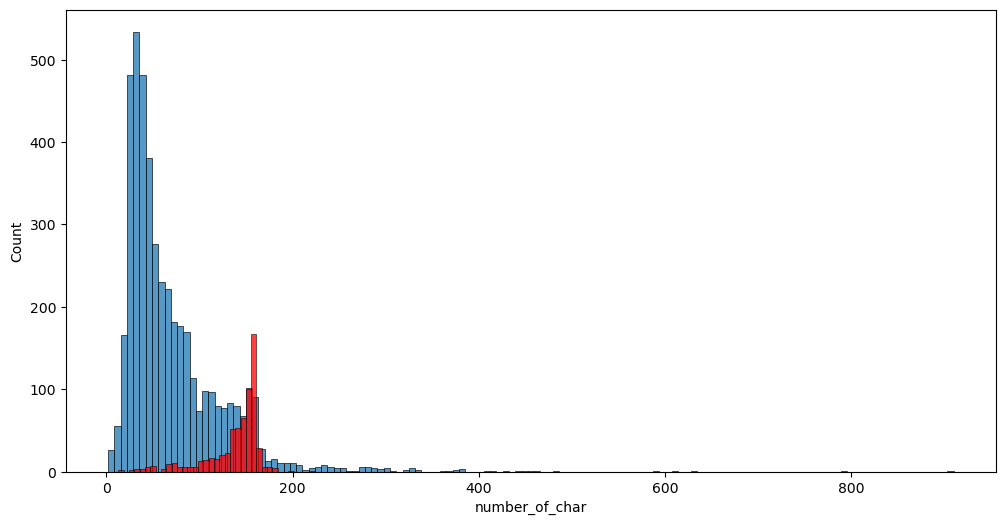

In [116]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['number_of_char'])
sns.histplot(df[df['label']==1]['number_of_char'],color='red')

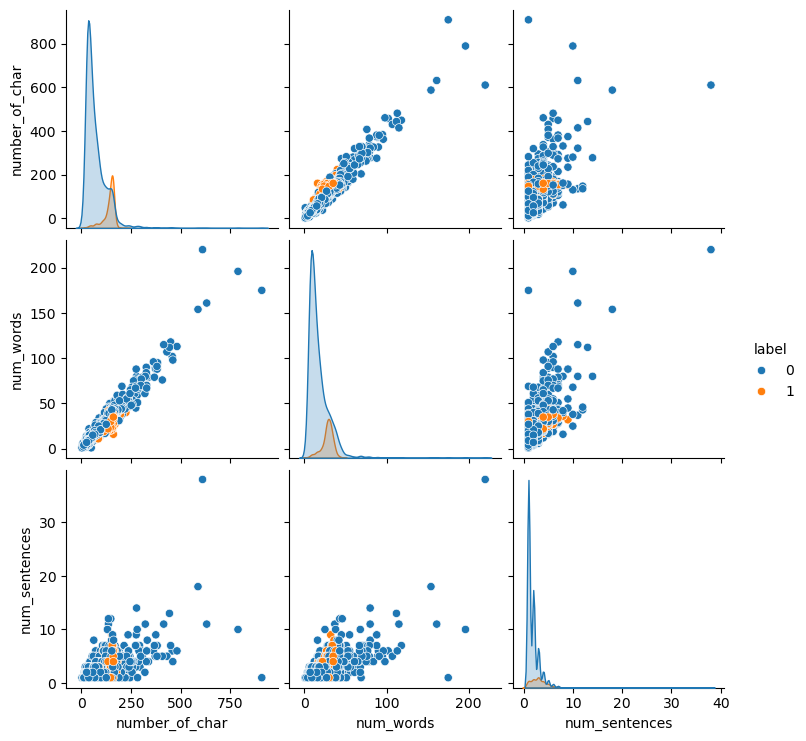

In [117]:
sns.pairplot(df,hue='label')

<Axes: >

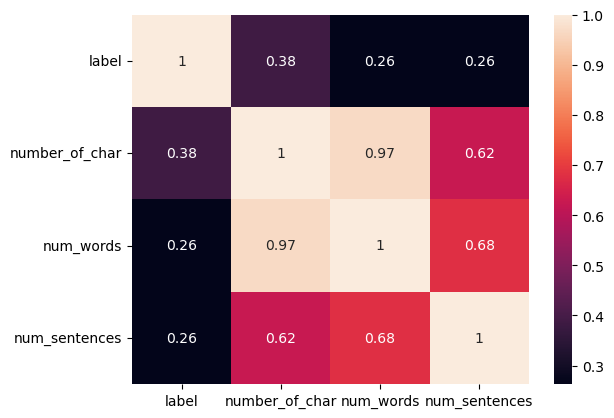

In [118]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [119]:
# Here we can see feature number of char is highly corelated with label

**Data Preprocessing**

In [120]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [122]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [123]:
from nltk.stem import PorterStemmer #Reduce each words in text to its root node
ps=PorterStemmer()
ps.stem('loving')

'love'

In [235]:
def transform_text(text):
    text=text.lower() # converting text to lowercase
    text=nltk.word_tokenize(text) # parting the text based of words
    y=[]
    for i in text:# removing specail character
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text: # removing stopwords and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [236]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [126]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [127]:
df['transform_text']=df['text'].apply(lambda x: transform_text(str(x)))

C:\Users\adity\AppData\Local\Temp\ipykernel_17516\3947831733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=df['text'].apply(lambda x: transform_text(str(x)))


In [128]:
df.head()

,label,text,number_of_char,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [129]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [130]:
#creating world cloud 
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='White')

In [131]:
spam_wc=wc.generate(df[df['label']==1]['transform_text'].str.cat(sep="  "))

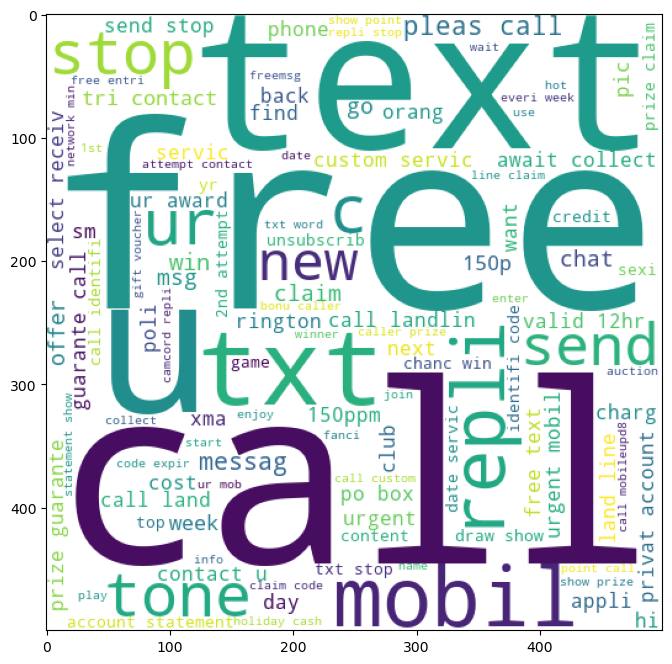

In [132]:
plt.figure(figsize=(10,8),dpi=100)
plt.imshow(spam_wc)

In [133]:
non_spam_wc=wc.generate(df[df['label']==0]['transform_text'].str.cat(sep="  "))

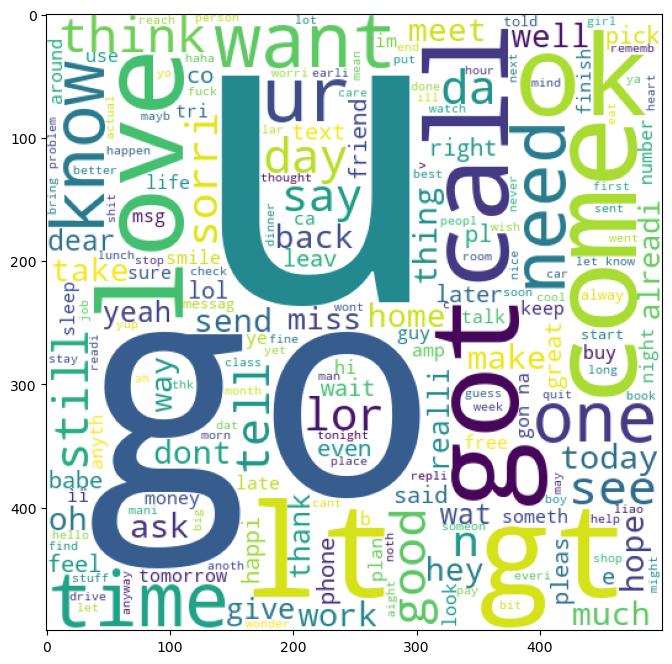

In [134]:
plt.figure(figsize=(10,8),dpi=100)
plt.imshow(non_spam_wc)

In [135]:
df.head()

,label,text,number_of_char,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [136]:

spam_corpus=[]
for msg in df[df['label']==1]['transform_text'].tolist():
    for  word in msg.split():
         spam_corpus.append(word)

In [137]:
len(spam_corpus)

9939

In [138]:
#create dict that contain info about how many times each word occur in corpus 
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))#most common words in spam SMS

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [139]:
# most common words in non_spam
ham_corpus=[]
for msg in df[df['label']==0]['transform_text'].tolist():
    for  word in msg.split():
         ham_corpus.append(word)

In [140]:
len(ham_corpus)

35402

In [141]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


**Model Building**

In [224]:
#vectorizing the text data with Tfidf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [209]:
# Bag of words

In [181]:
X=cv.fit_transform(df['transform_text']).toarray()

In [182]:
X.shape

(5169, 6708)

In [183]:
y=df['label'].values

In [184]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [187]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [188]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [189]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print('Precision Score :',precision_score(y_test,y_pred1))

Accuracy score : 0.8684719535783365
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       889
           1       0.52      0.87      0.65       145

    accuracy                           0.87      1034
   macro avg       0.75      0.87      0.78      1034
weighted avg       0.91      0.87      0.88      1034

Precision Score : 0.5185185185185185


In [190]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print('Precision Score :',precision_score(y_test,y_pred2))

Accuracy score : 0.9738878143133463
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.93      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.97      0.97      0.97      1034

Precision Score : 0.8881578947368421


In [191]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print('Precision Score :',precision_score(y_test,y_pred3))

Accuracy score : 0.9661508704061895
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034

Precision Score : 0.9661016949152542


In [192]:
#Bag of words countvectorizer---->bnb has highest precision score


In [225]:
#tfidf vectorizer

In [226]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [227]:
y=df['label'].values

In [228]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [229]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print('Precision Score :',precision_score(y_test,y_pred1))

Accuracy score : 0.8597678916827853
              precision    recall  f1-score   support

           0       0.97      0.87      0.91       889
           1       0.50      0.83      0.62       145

    accuracy                           0.86      1034
   macro avg       0.73      0.85      0.77      1034
weighted avg       0.90      0.86      0.87      1034

Precision Score : 0.5


In [230]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print('Precision Score :',precision_score(y_test,y_pred2))

Accuracy score : 0.9729206963249516
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Precision Score : 0.9915966386554622


In [231]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print('Precision Score :',precision_score(y_test,y_pred3))

Accuracy score : 0.9738878143133463
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.84      0.90       145

    accuracy                           0.97      1034
   macro avg       0.97      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Precision Score : 0.9682539682539683


In [232]:
# Tfidf---->mnb has highest precision score

In [234]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))